In [5]:
import numpy as np
import matplotlib.pyplot as chart
import math
from scipy.integrate import ode

In [2]:
##### define signum function #####
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return x

In [4]:
def model(t, X, params):
	m, M, L, g, eta, l1, l2, gamma = params

	x1, x2, x3, x4 = X

	f1 = m*L*(x4**2)*math.sin(x3) - m*g*math.sin(2*x3)/2
	g1 = M + m*((math.sin(x3))**2)
	g2 = (M + m*((math.sin(x3))**2))/math.cos(x3)
	d1 = (g*math.sin(x3))/L

	s1 = x2 + l1*(x1 - 20)
	s2 = x4 + l2*(x3 - math.pi)

	S = s2 + gamma*s1

	v_eq = -d1 - l2*x4 - gamma*l1*x2
	v_sw = -eta*np.tanh(S)

	v = (1/((gamma/g1) - 1/g2))*(v_eq + v_sw)

	x1dot = x2
	x2dot = v/g1
	x3dot = x4
	x4dot = d1 - v/g2
	
	return [x1dot, x2dot, x3dot, x4dot]

In [23]:
def solve(params):
	
	t0 = 0
	X0 = [0, 0, math.pi, 0]
	t1 = 100
	dt = 0.001
	
	r = ode(model).set_integrator('dopri5', nsteps = 10000, method='bdf')
	r.set_initial_value(X0, t0).set_f_params(params)

	Y = np.zeros((int(t1/dt) + 1, 5))
	t =[0]
	i = 0

	while r.successful() and r.t < t1:
	
		r.integrate(r.t + dt)
		x1, x2, x3, x4 = r.y
		m, M, L, g, eta, l1, l2, gamma = params
		e_theta = x3*180.0/math.pi - 180
		e_x = x1 - 20
		s1 = x2 + l1*(x1 - 20)
		s2 = x4 + l2*(x3 - math.pi)

		S = s2 + gamma*s1
#		v_eq = -d1 - l2*x4 - gamma*l1*x2
#		v_sw = -eta*np.tanh(S)
#		v = (1/((gamma/g1) - 1/g2))*(v_eq + v_sw)
 		
		Y[i] = [e_theta, e_x, s1, s2, S]
		t.append(r.t)
		i = i + 1
	
	print(np.size(Y, 0))
	print(len(t))

	#Plotting Errors in Angular Position and Horizontal Position
	chart.title('Errors in Angular and Horizontal Positions')
	chart.xlabel('Time') and chart.ylabel('Error')
	chart.plot(t, Y[:,0], label='error_theta')
	chart.plot(t, Y[:,1], label='error_x')
	chart.legend(loc='best', labels=['Angular Position Error', 'Horizontal Position Error'])
	chart.grid()
	chart.show()
	
	#Plotting Sliding Surfaces and Combined Sliding Surface:
	labels = ['s_x', 's_theta', 'S']
	
	for i in range(3):
		chart.plot(t, Y[:,i+2], label=labels[i])
	chart.title('Sliding Surfaces and Combined Sliding Surface')
	chart.xlabel('Time') and chart.ylabel('Sliding Surface Value')
	chart.legend(loc='best', labels=['s_x', 's_theta', 'Combined Sliding Surface'])	
	chart.grid()
	chart.show()

100001
100001


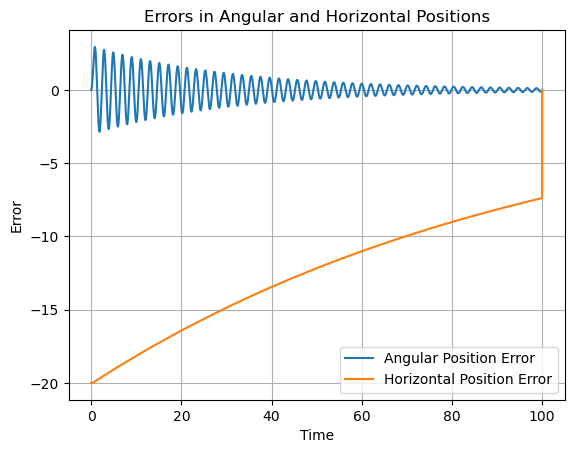

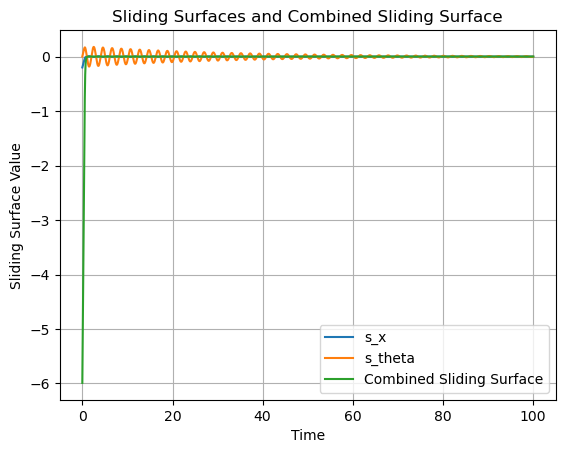

In [24]:
if __name__ == '__main__':

	#params    m,   M, L,  g, eta, l1,  l2, gamma
	params = [0.02, 2, 1, 9.8, 10, 0.01, 2, 30]	
	solve(params)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute sliding surfaces
def sliding_surfaces(X, params):
    x1, x2, x3, x4 = X
    l1, l2 = params[5], params[6]

    s1 = x2 + l1 * (x1 - 20)
    s2 = x4 + l2 * (x3 - np.pi)

    return s1, s2

# Simulation parameters
params = [0.02, 2, 1, 9.8, 10, 0.01, 2, 30]
t0, t1, dt = 0, 20, 0.001
X0 = [0, 0, np.pi, 0]

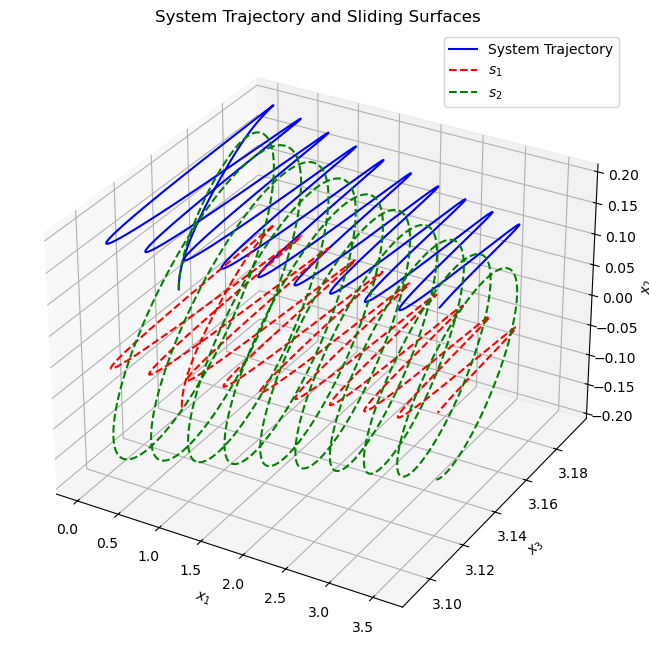

In [38]:
# Initialize arrays to store data
t_vals = np.arange(t0, t1 + dt, dt)
X_vals = np.zeros((len(t_vals), len(X0)))

# Simulation loop
X = np.array(X0)
for i, t in enumerate(t_vals):
    X_vals[i] = X
    Xdot = model(t, X, params)
    Xdot = np.array(Xdot)
    X = X + (Xdot * dt)

# Compute sliding surfaces
s1_vals, s2_vals = sliding_surfaces(X_vals.T, params)

# Plot 3D trajectory and sliding surfaces
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory
ax.plot(X_vals[:, 0], X_vals[:, 2], X_vals[:, 1], label='System Trajectory', color='blue')

# Plot the sliding surfaces
ax.plot(X_vals[:, 0], X_vals[:, 2], s1_vals, label='$s_1$', linestyle='dashed', color='red')
ax.plot(X_vals[:, 0], X_vals[:, 2], s2_vals, label='$s_2$', linestyle='dashed', color='green')

# Set labels and legend
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_3$')
ax.set_zlabel('$x_2$')
ax.legend()

plt.title('System Trajectory and Sliding Surfaces')
plt.show()

In [29]:
random_array = np.random.rand(1, 5)

In [30]:
random_array = random_array * 0.001

In [31]:
random_array 

array([[3.29937238e-05, 9.26990808e-04, 4.31962072e-04, 8.20602557e-04,
        4.06214671e-04]])

In [35]:
a = [0.0, 0.32257668117767596, 0.0, 0.3225766811776772] 

In [36]:
a = np.array(a)

In [37]:
a* 0.001

array([0.        , 0.00032258, 0.        , 0.00032258])